In [124]:
# Adapted From https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Adapted From https://medium.com/coinmonks/handwritten-digit-prediction-using-convolutional-neural-networks-in-tensorflow-with-keras-and-live-5ebddf46dc8
# Adapted from https://www.tensorflow.org/guide/keras/save_and_serialize
# imports 
import tensorflow as tf
from tensorflow import keras
import numpy as np

# import the mnist dataset from keras
from keras.datasets import mnist
# matplotlib used to visualise the data
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [111]:
# Loading in the dataset
# x_train is the image of number, y_train is the number the image contains
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [112]:
# (Amount of images in the dataset, Rows of pixels, Cols of pixels)
x_train.shape




(60000, 28, 28)

5


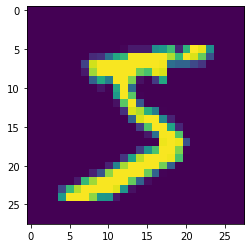

In [113]:
%matplotlib inline 
image_index = 0
print(y_train[image_index])
# Prints out the first image as it appears in the file
plt.imshow(x_train[image_index])

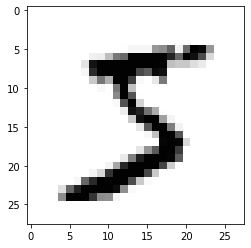

In [114]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Printing the first image out in greyscale
plt.imshow(x_train[image_index], cmap='Greys')

In [115]:
# The input shape that the CNN expects is a 4D Array - batch, height, width, channels
# The channels show whether the image is greyscaled or coloured
# 1 is given because greyscaled images are being used (3 for coloured)
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#input_shape = (28, 28, 1)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Type float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
# dataset has each pixel between 0-255, it is now 0-1
# http://aishack.in/tutorials/normalized-rgb/
x_train /= 255
x_test /= 255

# print outs
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


In [130]:
# Creating a Sequential Model and adding the layers
model = Sequential()
#https://heartbeat.fritz.ai/image-classification-on-android-using-a-keras-model-deployed-in-flask-118adffc5045#34af
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [131]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 32s 526us/step - loss: 0.2132 - accuracy: 0.9347


In [118]:
#model.evaluate(x_test, y_test)


In [132]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Save predictions for future checks
predictions = model.predict(x_test)

In [145]:
model_json = model.to_json()

with open("Model/model.json", "w") as json_file:
  json_file.write(model_json)



# Save the weights
model.save('Model/model.h5')

In [143]:
new_model = keras.models.load_model('Model/model.h5')

In [144]:
predictions = new_model.predict([x_test])

# print('x_test shape', [x_test])

# use numpy to help make a prediction on x_test set
print('At predictions index 0, number is a ', np.argmax(predictions[4]))

At predictions index 0, number is a  4


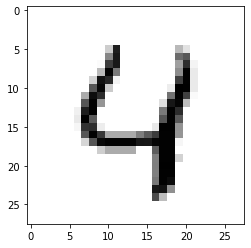

In [141]:
# prints out the first image in the test dataset
plt.imshow(x_test[4].reshape(28, 28), cmap=plt.cm.binary)